In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import additive_noise
from ML2_lib import algo_sgd
from ML2_lib import valid

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()


loss (5,)
w (6,)
(5, 1)
[1.790730438608829, 1.8865086798143709, 1.8935269182332448, 1.843427370536804, 1.7787118188896942]


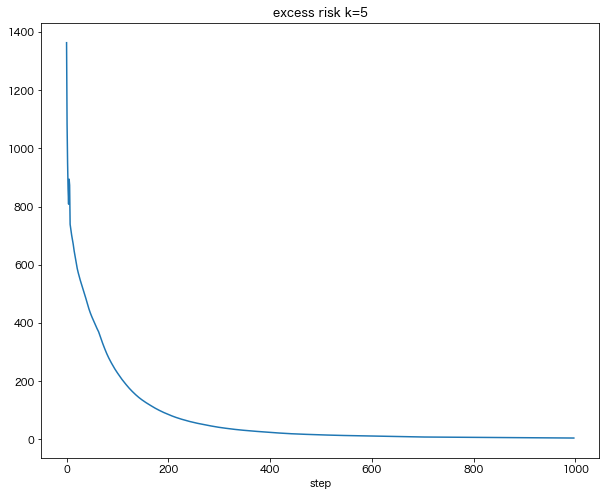

In [3]:
exp_normal = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)
k = 5
tr = exp_normal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

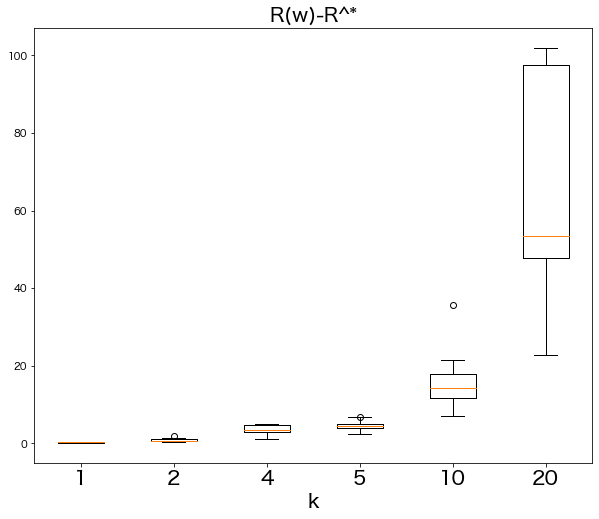

In [4]:
_, result_loss_normal = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_normal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [5]:
df = pd.DataFrame(result_loss_normal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.253008,0.843257,3.572339,4.501543,16.281841,66.441219
std,0.132120,0.466554,1.221629,1.491154,7.936289,29.079149
min,0.081151,0.431484,1.247983,2.431162,7.080855,22.686219
25%,0.165830,0.554213,2.799507,3.848251,11.791777,47.765755
50%,0.237242,0.647583,3.466680,4.398580,14.246596,53.557137
75%,0.358527,1.025740,4.784859,5.003766,17.940532,97.499842
max,0.468960,1.803763,4.874296,6.893122,35.624094,101.961644


loss (5,)
w (6,)
(5, 1)
[76.11727228449222, 76.12539261492543, 76.0954204020498, 76.18592393861486, 76.18247853648361]


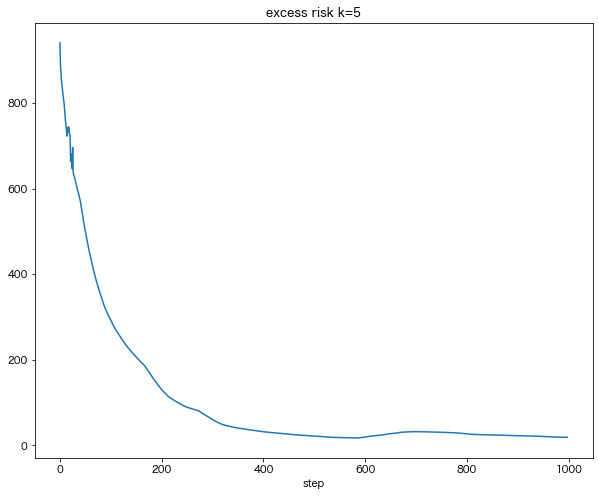

In [12]:
# 学習率は0.01/t * sqrt(d) ノイズはt対数正規分布
X_mean = 5
X_var = 2
E_var = 1.7
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()


exp_lognormal = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)
k = 5
tr = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(tr)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

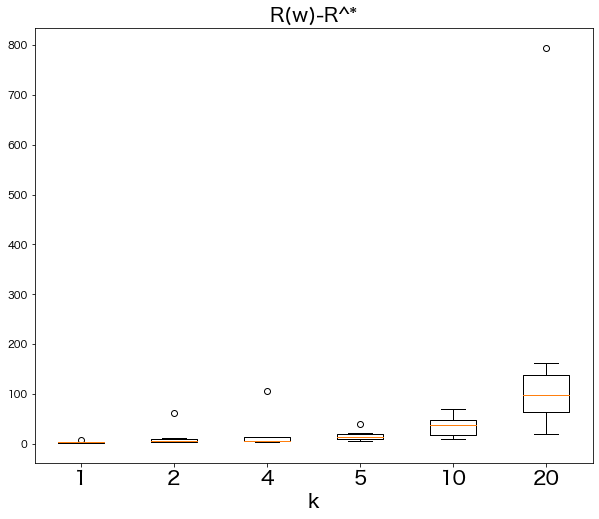

In [13]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [14]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.282616,11.889642,17.508160,15.670246,34.496960,160.381899
std,1.958286,17.881942,31.238614,10.329958,19.475237,227.741588
min,1.351383,2.950560,3.522667,4.933362,8.928328,18.657822
25%,2.218726,4.000480,4.886251,9.602862,17.589366,62.878419
50%,3.080617,5.923015,6.431819,12.761925,37.283057,98.697097
75%,3.456946,9.481883,12.821727,19.509270,47.044518,138.699846
max,8.404236,62.134712,105.779739,40.189406,68.770723,794.939270
